In [ ]:
from google.colab import files
import io
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.mixture import GaussianMixture
from pylab import concatenate, normal
from scipy.stats import ks_2samp
from datetime import date

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['owid-covid-data.csv']))

Saving owid-covid-data.csv to owid-covid-data.csv


In [ ]:
df=df.fillna(0)
df_ind = df.loc[df["location"] == "India"]
df_sa = df.loc[df["location"] == "South Africa"]
df_zim = df.loc[df["location"] == "Zimbabwe"]
df_afg = df.loc[df["location"] == "Afghanistan"]
df_us = df.loc[df["location"] == "United States"]
df_uk = df.loc[df["location"] == "United Kingdom"]
df_ger = df.loc[df["location"] == "Germany"]
df_ind=df_ind.iloc[:,[3,5]]
df_sa=df_sa.iloc[:,[3,5]]
df_zim=df_zim.iloc[:,[3,5]]
df_afg=df_afg.iloc[:,[3,5]]
df_us=df_us.iloc[:,[3,5]]
df_uk=df_uk.iloc[:,[3,5]]
df_ger=df_ger.iloc[:,[3,5]]

In [ ]:
df_zim=df_zim.iloc[:600,:]
df_sa=df_sa.iloc[:650,:]
df_afg=df_afg.iloc[:600,:]
df_us=df_us.iloc[:680,:]
df_uk=df_uk.iloc[:580,:]
df_ger=df_ger.iloc[:550,:]

In [ ]:
df_ind.reset_index(inplace=True,drop=True)
df_zim.reset_index(inplace=True,drop=True)
df_sa.reset_index(inplace=True,drop=True)
df_afg.reset_index(inplace=True,drop=True)
df_us.reset_index(inplace=True,drop=True)
df_uk.reset_index(inplace=True,drop=True)
df_ger.reset_index(inplace=True,drop=True)

In [ ]:
m,d,y=df_ind.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_ind.index.max()+1):
  m1,d1,y1=df_ind.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_ind.iloc[i,0]=(date1-date0).days
  if df_ind.iloc[i,1]==0:
    df_ind.iloc[i,1]=(df_ind.iloc[i-1,1]+df_ind.iloc[i+1,1])/2
df_ind['new_cases']=df_ind['new_cases'].astype(int)

m,d,y=df_sa.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_sa.index.max()+1):
  m1,d1,y1=df_sa.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_sa.iloc[i,0]=(date1-date0).days
  if df_sa.iloc[i,1]==0:
    df_sa.iloc[i,1]=(df_sa.iloc[i-1,1]+df_sa.iloc[i+1,1])/2
df_sa['new_cases']=df_sa['new_cases'].astype(int)

m,d,y=df_zim.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_zim.index.max()+1):
  m1,d1,y1=df_zim.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_zim.iloc[i,0]=(date1-date0).days
  if df_zim.iloc[i,1]==0:
    df_zim.iloc[i,1]=df_zim.iloc[i+1,1]/2
    df_zim.iloc[i+1,1]=df_zim.iloc[i+1,1]-df_zim.iloc[i,1]
df_zim['new_cases']=df_zim['new_cases'].astype(int)

m,d,y=df_afg.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_afg.index.max()+1):
  m1,d1,y1=df_afg.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_afg.iloc[i,0]=(date1-date0).days
  if df_afg.iloc[i,1]==0:
    df_afg.iloc[i,1]=(df_afg.iloc[i-1,1]+df_afg.iloc[i+1,1])/2
df_afg['new_cases']=df_afg['new_cases'].astype(int)

m,d,y=df_us.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_us.index.max()+1):
  m1,d1,y1=df_us.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_us.iloc[i,0]=(date1-date0).days
  if df_us.iloc[i,1]==0:
    df_us.iloc[i,1]=(df_us.iloc[i-1,1]+df_us.iloc[i+1,1])/2
df_us['new_cases']=df_us['new_cases'].astype(int)

m,d,y=df_uk.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_uk.index.max()+1):
  m1,d1,y1=df_uk.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_uk.iloc[i,0]=(date1-date0).days
  if df_uk.iloc[i,1]==0:
    df_uk.iloc[i,1]=(df_uk.iloc[i-1,1]+df_uk.iloc[i+1,1])/2
df_uk['new_cases']=df_uk['new_cases'].astype(int)

m,d,y=df_ger.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_ger.index.max()+1):
  m1,d1,y1=df_ger.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_ger.iloc[i,0]=(date1-date0).days
  if df_ger.iloc[i,1]==0:
    df_ger.iloc[i,1]=(df_ger.iloc[i-1,1]+df_ger.iloc[i+1,1])/2
df_ger['new_cases']=df_ger['new_cases'].astype(int)

arr_ind=np.array([0])
arr_ind=arr_ind.reshape(-1,1)
arr_ind0=np.array(df_ind)
lim=df_ind.index.max()+1
for i in range(1,lim):
  if df_ind.iloc[i,1]==0:
    df_ind.iloc[i,1]=(df_ind.iloc[i-1,1]+df_ind.iloc[i+1,1])/2
  day=arr_ind0[i][0]
  num_cases=arr_ind0[i][1]
  arr_ind=np.vstack((arr_ind,np.full((num_cases,1),day)))

arr_sa=np.array([0])
arr_sa=arr_sa.reshape(-1,1)
arr_sa0=np.array(df_sa)
lim=df_sa.index.max()+1
for i in range(1,lim):
  day=arr_sa0[i][0]
  num_cases=arr_sa0[i][1]
  arr_sa=np.vstack((arr_sa,np.full((num_cases,1),day)))

arr_zim=np.array([0])
arr_zim=arr_zim.reshape(-1,1)
arr_zim0=np.array(df_zim)
lim=df_zim.index.max()+1
for i in range(1,lim):
  day=arr_zim0[i][0]
  num_cases=arr_zim0[i][1]
  arr_zim=np.vstack((arr_zim,np.full((num_cases,1),day)))

arr_afg=np.array([0])
arr_afg=arr_afg.reshape(-1,1)
arr_afg0=np.array(df_afg)
lim=df_afg.index.max()+1
for i in range(1,lim):
  day=arr_afg0[i][0]
  num_cases=arr_afg0[i][1]
  arr_afg=np.vstack((arr_afg,np.full((num_cases,1),day)))

arr_us=np.array([0])
arr_us=arr_us.reshape(-1,1)
arr_us0=np.array(df_us)
lim=df_us.index.max()+1
for i in range(1,lim):
  day=arr_us0[i][0]
  num_cases=arr_us0[i][1]
  arr_us=np.vstack((arr_us,np.full((num_cases,1),day)))

arr_uk=np.array([0])
arr_uk=arr_uk.reshape(-1,1)
arr_uk0=np.array(df_uk)
lim=df_uk.index.max()+1
for i in range(1,lim):
  day=arr_uk0[i][0]
  num_cases=arr_uk0[i][1]
  arr_uk=np.vstack((arr_uk,np.full((num_cases,1),day)))

arr_ger=np.array([0])
arr_ger=arr_ger.reshape(-1,1)
arr_ger0=np.array(df_ger)
lim=df_ger.index.max()+1
for i in range(1,lim):
  day=arr_ger0[i][0]
  num_cases=arr_ger0[i][1]
  arr_ger=np.vstack((arr_ger,np.full((num_cases,1),day)))

[[1.36466722]]


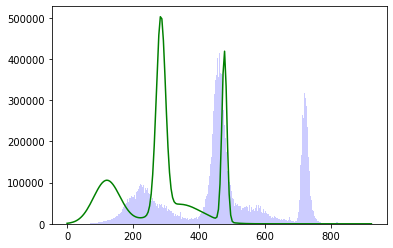

In [ ]:
ms=[232.37,460.27,553.03,722.86]
ms=np.array(ms)
ms=ms.reshape(4,1)
g=GaussianMixture(n_components=4, random_state=0,means_init=ms).fit(arr_ind)

n, bins, patches = plt.hist(arr_ind, df_ind['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_ind['date'].min(),df_ind['date'].max()+100,200).reshape(200,1)

Y1 = arr_ind.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_ind.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y3 = arr_ind.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y2b = arr_ind.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))

ior = Y1/max(Y1)+(Y2+Y2b)/max(Y2+Y2b)+Y3/max(Y3)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[3] - g.means_[0] + 3*np.sqrt(g.covariances_[3]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y2 = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y3 = 100*g.weights_[3]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[3]-g.means_[0])/dist,np.sqrt(g.covariances_[3])/dist)
y2b = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)

new_india_overall = y1+y2+y3+y2b
plt.plot(x,new_india_overall*arr_ind.size/100, c='green')

[[1.07461155]]


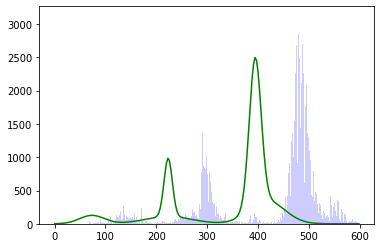

In [ ]:
ms=[139.873,257.044,299.802,482.366,499.212]
ms=np.array(ms)
ms=ms.reshape(5,1)
sum=0.059+0.032+0.169+0.307+0.194
ws=[0.059/sum,0.032/sum,0.169/sum,0.307/sum,0.194/sum]
ws=np.array(ws)
g=GaussianMixture(n_components=5, random_state=0,means_init=ms,weights_init=ws).fit(arr_zim)

n, bins, patches = plt.hist(arr_zim, df_zim['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_zim['date'].min(),df_zim['date'].max(),200).reshape(200,1)

Y1 = arr_zim.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_zim.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y3 = arr_zim.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y4 = arr_zim.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y5 = arr_zim.size*g.weights_[4]*stats.norm.pdf(x,g.means_[4],np.sqrt(g.covariances_[4]))

zor = Y1/max(Y1)+(Y2+Y3)/max(Y2+Y3)+(Y4+Y5)/max(Y4+Y5)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[4] - g.means_[0] + 3*np.sqrt(g.covariances_[3]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y2 = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y3 = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)
y4 = 100*g.weights_[3]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[3]-g.means_[0])/dist,np.sqrt(g.covariances_[3])/dist)
y5 = 100*g.weights_[4]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[4]-g.means_[0])/dist,np.sqrt(g.covariances_[4])/dist)

new_zim_overall = y1+y2+y3+y4+y5

plt.plot(x,new_zim_overall*arr_zim.size/100, c='green')

[[1.24289448]]


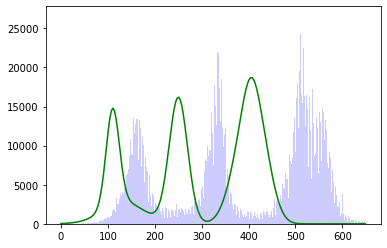

In [ ]:
ms=[145.41,164.50,332.79,506.20,538.45,566.85]
ms=np.array(ms)
ms=ms.reshape(6,1)
g=GaussianMixture(n_components=6, random_state=0,means_init=ms).fit(arr_sa)

n, bins, patches = plt.hist(arr_sa, df_sa['new_cases'].size, facecolor='blue', alpha=0.2)
# x = np.linspace(df_sa['date'].min(),df_sa['date'].max(),200).reshape(200,1)
x = np.linspace(df_sa['date'].min(),df_sa['date'].max(),200).reshape(200,1)

Y1 = arr_sa.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y1b = arr_sa.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2 = arr_sa.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y3 = arr_sa.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y3b = arr_sa.size*g.weights_[4]*stats.norm.pdf(x,g.means_[4],np.sqrt(g.covariances_[4]))
Y3c = arr_sa.size*g.weights_[5]*stats.norm.pdf(x,g.means_[5],np.sqrt(g.covariances_[5]))

saor = (Y1+Y1b)/max(Y1+Y1b)+Y2/max(Y2)+(Y3+Y3b+Y3c)/max(Y3+Y3b+Y3c)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[5] - g.means_[0] + 3*np.sqrt(g.covariances_[5]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y1b = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y2 = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)
y3 = 100*g.weights_[3]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[3]-g.means_[0])/dist,np.sqrt(g.covariances_[3])/dist)
y3b = 100*g.weights_[4]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[4]-g.means_[0])/dist,np.sqrt(g.covariances_[4])/dist)
y3c = 100*g.weights_[5]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[5]-g.means_[0])/dist,np.sqrt(g.covariances_[5])/dist)

new_sa_overall = y1+y1b+y2+y3+y3b+y3c

plt.plot(x,new_sa_overall*arr_sa.size/100, c='green')

[[1.10264032]]


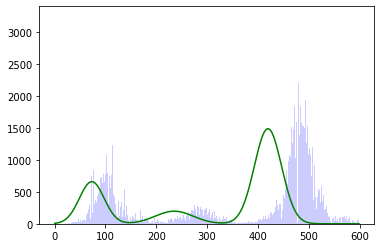

In [ ]:
ms=[104.08,282.89,486.08]
ms=np.array(ms)
ms=ms.reshape(3,1)
g=GaussianMixture(n_components=3, random_state=0,means_init=ms).fit(arr_afg)

n, bins, patches = plt.hist(arr_afg, df_afg['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_afg['date'].min(),df_afg['date'].max(),200).reshape(200,1)

Y1 = arr_afg.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_afg.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y3 = arr_afg.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))

afgor = Y1/max(Y1)+Y2/max(Y2)+Y3/max(Y3)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[2] - g.means_[0] + 3*np.sqrt(g.covariances_[2]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y2 = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y3 = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)

new_afg_overall = y1+y2+y3
plt.plot(x,new_afg_overall*arr_afg.size/100, c='green')

[[1.45539234]]


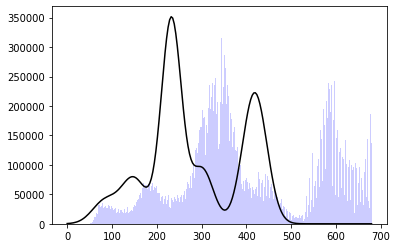

In [ ]:
ms=[109.31,205.33,332,431.90,603.21]
ms=np.array(ms)
ms=ms.reshape(5,1)
g=GaussianMixture(n_components=5, means_init=ms).fit(arr_us)

n, bins, patches = plt.hist(arr_us, df_us['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_us['date'].min(),df_us['date'].max(),200).reshape(200,1)

Y1 = arr_us.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y1b = arr_us.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2 = arr_us.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y2b = arr_us.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y3 = arr_us.size*g.weights_[4]*stats.norm.pdf(x,g.means_[4],np.sqrt(g.covariances_[4]))

usor = (Y1+Y1b)/max(Y1+Y1b) + (Y2+Y2b)/max(Y2+Y2b) + Y3/max(Y3)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[4] - g.means_[0] + 3*np.sqrt(g.covariances_[4]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y1b = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y2 = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)
y2b = 100*g.weights_[3]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[3]-g.means_[0])/dist,np.sqrt(g.covariances_[3])/dist)
y3 = 100*g.weights_[4]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[4]-g.means_[0])/dist,np.sqrt(g.covariances_[4])/dist)

new_us_overall = y1 + y1b + y2 + y2b + y3
plt.plot(x,new_us_overall*arr_us.size/100,c="black")

[[1.20853617]]


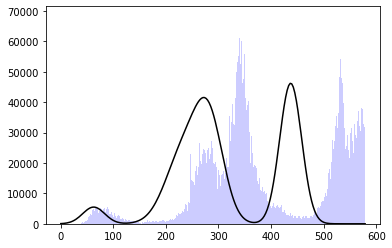

In [ ]:
ms=[85,275,330,520]
ms=np.array(ms)
ms=ms.reshape(4,1)
g=GaussianMixture(n_components=4, means_init=ms).fit(arr_uk)

n, bins, patches = plt.hist(arr_uk, df_uk['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_uk['date'].min(),df_uk['date'].max(),200).reshape(200,1)

Y1 = arr_uk.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_uk.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2b = arr_uk.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y3 = arr_uk.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))

ukor = Y1/max(Y1) + (Y2+Y2b)/max(Y2+Y2b) + Y3/max(Y3)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[3] - g.means_[0] + 3*np.sqrt(g.covariances_[3]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y2 = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y2b = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)
y3 = 100*g.weights_[3]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[3]-g.means_[0])/dist,np.sqrt(g.covariances_[3])/dist)

new_uk_overall = y1 + y2 + y2b + y3

plt.plot(x,new_uk_overall*arr_uk.size/100,c="black")

[[0.99999591]]


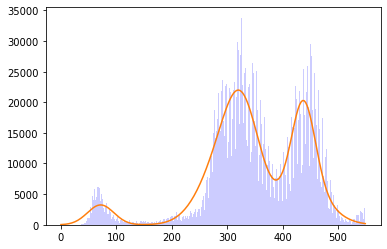

In [ ]:
ms=[73.66,294.90,337.85,442,447]
ms=np.array(ms)
ms=ms.reshape(5,1)
g=GaussianMixture(n_components=5, means_init=ms).fit(arr_ger)

n, bins, patches = plt.hist(arr_ger, df_ger['new_cases'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_ger['date'].min(),df_ger['date'].max(),200).reshape(200,1)

Y1 = arr_ger.size*g.weights_[0]*stats.norm.pdf(x,g.means_[0],np.sqrt(g.covariances_[0]))
Y2 = arr_ger.size*g.weights_[1]*stats.norm.pdf(x,g.means_[1],np.sqrt(g.covariances_[1]))
Y2b = arr_ger.size*g.weights_[2]*stats.norm.pdf(x,g.means_[2],np.sqrt(g.covariances_[2]))
Y3 = arr_ger.size*g.weights_[3]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[3]))
Y3b = arr_ger.size*g.weights_[4]*stats.norm.pdf(x,g.means_[3],np.sqrt(g.covariances_[4]))

gor = Y1/max(Y1) + (Y2+Y2b)/max(Y2+Y2b) + (Y3+Y3b)/max(Y3+Y3b)

dist = (3*np.sqrt(g.covariances_[0]) + g.means_[4] - g.means_[0] + 3*np.sqrt(g.covariances_[4]))/500
print(dist)

y1 = 100*g.weights_[0]*stats.norm.pdf(x,3*np.sqrt(g.covariances_[0])/dist,np.sqrt(g.covariances_[0])/dist)
y2 = 100*g.weights_[1]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[1]-g.means_[0])/dist,np.sqrt(g.covariances_[1])/dist)
y2b = 100*g.weights_[2]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[2]-g.means_[0])/dist,np.sqrt(g.covariances_[2])/dist)
y3 = 100*g.weights_[3]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[3]-g.means_[0])/dist,np.sqrt(g.covariances_[3])/dist)
y3b = 100*g.weights_[4]*stats.norm.pdf(x,(3*np.sqrt(g.covariances_[0])+g.means_[4]-g.means_[0])/dist,np.sqrt(g.covariances_[4])/dist)

new_ger_overall = y1 + y2 + y2b + y3 +y3b
plt.plot(x,new_ger_overall*arr_ger.size/100)

In [ ]:
print(zor.shape)
print(new_zim_overall.shape)

(200, 1)
(200, 1)


In [ ]:
ior = np.ravel(ior)
zor = np.ravel(zor)
saor = np.ravel(saor)
afgor = np.ravel(afgor)
usor = np.ravel(usor)
ukor = np.ravel(ukor)
gor = np.ravel(gor)
new_india_overall = np.ravel(new_india_overall)
new_zim_overall = np.ravel(new_zim_overall)
new_sa_overall = np.ravel(new_sa_overall)
new_afg_overall = np.ravel(new_afg_overall)
new_us_overall = np.ravel(new_us_overall)
new_uk_overall = np.ravel(new_uk_overall)
new_ger_overall = np.ravel(new_ger_overall)

In [ ]:
print(zor.shape)
print(new_zim_overall.shape)

(200,)
(200,)


In [ ]:
print("Ind vs Zim : ",ks_2samp(ior, zor))
print("Ind vs SA : ",ks_2samp(ior, saor))
print("Ind vs Afg : ",ks_2samp(ior, afgor))
print("Ind vs USA : ",ks_2samp(ior, usor))
print("Ind vs UK : ",ks_2samp(ior, ukor))
print("Ind vs Ger : ",ks_2samp(ior, gor))
print("\n")
print("Ind vs Zim : ",ks_2samp(new_india_overall, new_zim_overall))
print("Ind vs SA : ",ks_2samp(new_india_overall, new_sa_overall))
print("Ind vs Afg : ",ks_2samp(new_india_overall, new_afg_overall))
print("Ind vs USA : ",ks_2samp(new_india_overall, new_us_overall))
print("Ind vs UK : ",ks_2samp(new_india_overall, new_uk_overall))
print("Ind vs Ger : ",ks_2samp(new_india_overall, new_ger_overall))

Ind vs Zim :  Ks_2sampResult(statistic=0.16, pvalue=0.011843449760085422)
Ind vs SA :  Ks_2sampResult(statistic=0.225, pvalue=7.536785951251345e-05)
Ind vs Afg :  Ks_2sampResult(statistic=0.285, pvalue=1.4639479233432268e-07)
Ind vs USA :  Ks_2sampResult(statistic=0.485, pvalue=1.0971108602139472e-21)
Ind vs UK :  Ks_2sampResult(statistic=0.29, pvalue=8.114129962716335e-08)
Ind vs Ger :  Ks_2sampResult(statistic=0.235, pvalue=2.9607827368482373e-05)


Ind vs Zim :  Ks_2sampResult(statistic=0.3, pvalue=2.4125498977354686e-08)
Ind vs SA :  Ks_2sampResult(statistic=0.19, pvalue=0.0014264303851701861)
Ind vs Afg :  Ks_2sampResult(statistic=0.305, pvalue=1.2940880677508261e-08)
Ind vs USA :  Ks_2sampResult(statistic=0.225, pvalue=7.536785951251345e-05)
Ind vs UK :  Ks_2sampResult(statistic=0.295, pvalue=4.448673570292354e-08)
Ind vs Ger :  Ks_2sampResult(statistic=0.415, pvalue=8.330858010549734e-16)


In [ ]:
from scipy.stats import epps_singleton_2samp as epps
print("Ind vs Zim : ",epps(ior, zor))
print("Ind vs SA : ",epps(ior, saor))
print("Ind vs Afg : ",epps(ior, afgor))
print("Ind vs USA : ",epps(ior, usor))
print("Ind vs UK : ",epps(ior, ukor))
print("Ind vs Ger : ",epps(ior, gor))
print("\n")
print("Ind vs Zim : ",epps(new_india_overall, new_zim_overall))
print("Ind vs SA : ",epps(new_india_overall, new_sa_overall))
print("Ind vs Afg : ",epps(new_india_overall, new_afg_overall))
print("Ind vs USA : ",epps(new_india_overall, new_us_overall))
print("Ind vs UK : ",epps(new_india_overall, new_uk_overall))
print("Ind vs Ger : ",epps(new_india_overall, new_ger_overall))

Ind vs Zim :  Epps_Singleton_2sampResult(statistic=2.9945914080619813, pvalue=0.5587309229413727)
Ind vs SA :  Epps_Singleton_2sampResult(statistic=15.956021901947254, pvalue=0.0030787469756572163)
Ind vs Afg :  Epps_Singleton_2sampResult(statistic=35.47834693672445, pvalue=3.704463163928036e-07)
Ind vs USA :  Epps_Singleton_2sampResult(statistic=139.2086531396313, pvalue=4.1692349447494176e-29)
Ind vs UK :  Epps_Singleton_2sampResult(statistic=34.953310458622965, pvalue=4.749068423263853e-07)
Ind vs Ger :  Epps_Singleton_2sampResult(statistic=21.921282719554135, pvalue=0.00020778223219854273)


Ind vs Zim :  Epps_Singleton_2sampResult(statistic=8.486675162285007, pvalue=0.0752921542670438)
Ind vs SA :  Epps_Singleton_2sampResult(statistic=45.339575844666655, pvalue=3.379329707143538e-09)
Ind vs Afg :  Epps_Singleton_2sampResult(statistic=14.246578415815328, pvalue=0.006548272131262509)
Ind vs USA :  Epps_Singleton_2sampResult(statistic=39.26300529605405, pvalue=6.147203471743209e-08)


In [ ]:
from scipy.stats import brunnermunzel as bmz
print("Ind vs Zim : ",bmz(ior, zor))
print("Ind vs SA : ",bmz(ior, saor))
print("Ind vs Afg : ",bmz(ior, afgor))
print("Ind vs USA : ",bmz(ior, usor))
print("Ind vs UK : ",bmz(ior, ukor))
print("Ind vs Ger : ",bmz(ior, gor))
print("\n")
print("Ind vs Zim : ",bmz(new_india_overall, new_zim_overall))
print("Ind vs SA : ",bmz(new_india_overall, new_sa_overall))
print("Ind vs Afg : ",bmz(new_india_overall, new_afg_overall))
print("Ind vs USA : ",bmz(new_india_overall, new_us_overall))
print("Ind vs UK : ",bmz(new_india_overall, new_uk_overall))
print("Ind vs Ger : ",bmz(new_india_overall, new_ger_overall))

Ind vs Zim :  BrunnerMunzelResult(statistic=0.4065915020210623, pvalue=0.6845363460655052)
Ind vs SA :  BrunnerMunzelResult(statistic=3.9187400253333244, pvalue=0.00010562018759552316)
Ind vs Afg :  BrunnerMunzelResult(statistic=5.937059863798745, pvalue=6.536261309975089e-09)
Ind vs USA :  BrunnerMunzelResult(statistic=10.888341968487454, pvalue=0.0)
Ind vs UK :  BrunnerMunzelResult(statistic=6.027275268015134, pvalue=3.9163565723754346e-09)
Ind vs Ger :  BrunnerMunzelResult(statistic=4.725734226299594, pvalue=3.2052630911660884e-06)


Ind vs Zim :  BrunnerMunzelResult(statistic=3.92845906328334, pvalue=0.00010572620689575096)
Ind vs SA :  BrunnerMunzelResult(statistic=3.69182248971517, pvalue=0.0002537348433091502)
Ind vs Afg :  BrunnerMunzelResult(statistic=5.305539030880866, pvalue=1.9705102061173818e-07)
Ind vs USA :  BrunnerMunzelResult(statistic=4.00871116144379, pvalue=7.298915185693922e-05)
Ind vs UK :  BrunnerMunzelResult(statistic=5.502548531507067, pvalue=7.001036150811046e

In [ ]:
! pip install similaritymeasures
import similaritymeasures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 395 kB 5.3 MB/s 
  Created wheel for similaritymeasures: filename=similaritymeasures-0.4.4-py3-none-any.whl size=14557 sha256=d9066db6237a7d235a19daace8c386ce1f598a2ad0bba32d624a1b1a298e0ada
  Stored in directory: /root/.cache/pip/wheels/a9/3a/35/009cc44db92a3500424a89baac7e77c219a44209c67f867a1e
Successfully built similaritymeasures


In [ ]:
print("Ind vs Zim : ",similaritymeasures.frechet_dist(ior, zor))
print("Ind vs SA : ",similaritymeasures.frechet_dist(ior, saor))
print("Ind vs Afg : ",similaritymeasures.frechet_dist(ior, afgor))
print("Ind vs USA : ",similaritymeasures.frechet_dist(ior, usor))
print("Ind vs UK : ",similaritymeasures.frechet_dist(ior, ukor))
print("Ind vs Ger : ",similaritymeasures.frechet_dist(ior, gor))
print("\n")
print("Ind vs Zim : ",similaritymeasures.frechet_dist(new_india_overall, new_zim_overall))
print("Ind vs SA : ",similaritymeasures.frechet_dist(new_india_overall, new_sa_overall))
print("Ind vs Afg : ",similaritymeasures.frechet_dist(new_india_overall, new_afg_overall))
print("Ind vs USA : ",similaritymeasures.frechet_dist(new_india_overall, new_us_overall))
print("Ind vs UK : ",similaritymeasures.frechet_dist(new_india_overall, new_uk_overall))
print("Ind vs Ger : ",similaritymeasures.frechet_dist(new_india_overall, new_ger_overall))

Ind vs Zim :  0.13236356399165505
Ind vs SA :  0.13225230501088503
Ind vs Afg :  0.12176761808906716
Ind vs USA :  0.4823460216636719
Ind vs UK :  0.29930986345070554
Ind vs Ger :  0.3621910789477042


Ind vs Zim :  0.7087116371679081
Ind vs SA :  0.5307202762106915
Ind vs Afg :  0.49500278798759745
Ind vs USA :  0.490064898988295
Ind vs UK :  0.4916517659480394
Ind vs Ger :  0.5766676677270477


In [ ]:
x=np.array(range(200))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",similaritymeasures.curve_length_measure(a,b))
print("Ind vs SA : ",similaritymeasures.curve_length_measure(a,c))
print("Ind vs Afg : ",similaritymeasures.curve_length_measure(a,d))
print("Ind vs USA : ",similaritymeasures.curve_length_measure(a,e))
print("Ind vs UK : ",similaritymeasures.curve_length_measure(a,f))
print("Ind vs Ger : ",similaritymeasures.curve_length_measure(a,g))
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",similaritymeasures.curve_length_measure(a,b))
print("Ind vs SA : ",similaritymeasures.curve_length_measure(a,c))
print("Ind vs Afg : ",similaritymeasures.curve_length_measure(a,d))
print("Ind vs USA : ",similaritymeasures.curve_length_measure(a,e))
print("Ind vs UK : ",similaritymeasures.curve_length_measure(a,f))
print("Ind vs Ger : ",similaritymeasures.curve_length_measure(a,g))

Ind vs Zim :  3.105985982420123
Ind vs SA :  3.9160182726061725
Ind vs Afg :  3.324937661842337
Ind vs USA :  7.972687425499658
Ind vs UK :  9.16198245949238
Ind vs Ger :  9.645889228737973


Ind vs Zim :  17.160922985510375
Ind vs SA :  11.272258687276787
Ind vs Afg :  13.650436458427958
Ind vs USA :  8.205284034458746
Ind vs UK :  10.053136452337467
Ind vs Ger :  12.233445590633213


In [ ]:
x=np.array(range(200))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",similaritymeasures.pcm(a,b))
print("Ind vs SA : ",similaritymeasures.pcm(a,c))
print("Ind vs Afg : ",similaritymeasures.pcm(a,d))
print("Ind vs USA : ",similaritymeasures.pcm(a,e))
print("Ind vs UK : ",similaritymeasures.pcm(a,f))
print("Ind vs Ger : ",similaritymeasures.pcm(a,g))
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",similaritymeasures.pcm(a,b))
print("Ind vs SA : ",similaritymeasures.pcm(a,c))
print("Ind vs Afg : ",similaritymeasures.pcm(a,d))
print("Ind vs USA : ",similaritymeasures.pcm(a,e))
print("Ind vs UK : ",similaritymeasures.pcm(a,f))
print("Ind vs Ger : ",similaritymeasures.pcm(a,g))

Ind vs Zim :  8.84629431735245
Ind vs SA :  5.682382215135162
Ind vs Afg :  6.031221426978156
Ind vs USA :  23.238514288600907
Ind vs UK :  18.978068209429576
Ind vs Ger :  20.73972401654204


Ind vs Zim :  29.060424625896765
Ind vs SA :  18.083880308963227
Ind vs Afg :  19.932121307596354
Ind vs USA :  9.128337641684883
Ind vs UK :  17.211038138858882
Ind vs Ger :  22.717125903616264


In [ ]:
x=np.array(range(200))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",similaritymeasures.dtw(a,b)[0])
print("Ind vs SA : ",similaritymeasures.dtw(a,c)[0])
print("Ind vs Afg : ",similaritymeasures.dtw(a,d)[0])
print("Ind vs USA : ",similaritymeasures.dtw(a,e)[0])
print("Ind vs UK : ",similaritymeasures.dtw(a,f)[0])
print("Ind vs Ger : ",similaritymeasures.dtw(a,g)[0])
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",similaritymeasures.dtw(a,b)[0])
print("Ind vs SA : ",similaritymeasures.dtw(a,c)[0])
print("Ind vs Afg : ",similaritymeasures.dtw(a,d)[0])
print("Ind vs USA : ",similaritymeasures.dtw(a,e)[0])
print("Ind vs UK : ",similaritymeasures.dtw(a,f)[0])
print("Ind vs Ger : ",similaritymeasures.dtw(a,g)[0])

Ind vs Zim :  25.260938538400477
Ind vs SA :  41.91125548977209
Ind vs Afg :  64.56030406857064
Ind vs USA :  69.85005949230562
Ind vs UK :  89.97340767432857
Ind vs Ger :  83.47921891548202


Ind vs Zim :  43.59915206809607
Ind vs SA :  37.26549667151013
Ind vs Afg :  37.36531216855171
Ind vs USA :  27.514151000604382
Ind vs UK :  39.524987699841965
Ind vs Ger :  44.80595358722605


In [ ]:
x=np.array(range(200))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",similaritymeasures.area_between_two_curves(a,b))
print("Ind vs SA : ",similaritymeasures.area_between_two_curves(a,c))
print("Ind vs Afg : ",similaritymeasures.area_between_two_curves(a,d))
print("Ind vs USA : ",similaritymeasures.area_between_two_curves(a,e))
print("Ind vs UK : ",similaritymeasures.area_between_two_curves(a,f))
print("Ind vs Ger : ",similaritymeasures.area_between_two_curves(a,g))
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",similaritymeasures.area_between_two_curves(a,b))
print("Ind vs SA : ",similaritymeasures.area_between_two_curves(a,c))
print("Ind vs Afg : ",similaritymeasures.area_between_two_curves(a,d))
print("Ind vs USA : ",similaritymeasures.area_between_two_curves(a,e))
print("Ind vs UK : ",similaritymeasures.area_between_two_curves(a,f))
print("Ind vs Ger : ",similaritymeasures.area_between_two_curves(a,g))

Ind vs Zim :  25.25726907974464
Ind vs SA :  41.90971481477514
Ind vs Afg :  64.55974512709209
Ind vs USA :  69.76814292174294
Ind vs UK :  89.82247858325591
Ind vs Ger :  83.47158942504653


Ind vs Zim :  43.59831846162966
Ind vs SA :  37.2646541926648
Ind vs Afg :  37.364362182266255
Ind vs USA :  27.513184004091265
Ind vs UK :  39.52407349599345
Ind vs Ger :  44.801900412431


In [ ]:
print("Ind vs Zim : ",np.corrcoef(ior, zor)[0,1])
print("Ind vs SA : ",np.corrcoef(ior, saor)[0,1])
print("Ind vs Afg : ",np.corrcoef(ior, afgor)[0,1])
print("Ind vs USA : ",np.corrcoef(ior, usor)[0,1])
print("Ind vs UK : ",np.corrcoef(ior, ukor)[0,1])
print("Ind vs Ger : ",np.corrcoef(ior, gor)[0,1])
print("\n")
print("Ind vs Zim : ",np.corrcoef(new_india_overall, new_zim_overall)[0,1])
print("Ind vs SA : ",np.corrcoef(new_india_overall, new_sa_overall)[0,1])
print("Ind vs Afg : ",np.corrcoef(new_india_overall, new_afg_overall)[0,1])
print("Ind vs USA : ",np.corrcoef(new_india_overall, new_us_overall)[0,1])
print("Ind vs UK : ",np.corrcoef(new_india_overall, new_uk_overall)[0,1])
print("Ind vs Ger : ",np.corrcoef(new_india_overall, new_ger_overall)[0,1])

Ind vs Zim :  0.764381555748457
Ind vs SA :  0.5761266843264121
Ind vs Afg :  0.2714693590766768
Ind vs USA :  0.441426928924902
Ind vs UK :  -0.20708329703135456
Ind vs Ger :  -0.13593625141637994


Ind vs Zim :  -0.1285132463748389
Ind vs SA :  -0.0734685110652344
Ind vs Afg :  -0.12333705349778293
Ind vs USA :  0.37408815278514645
Ind vs UK :  0.02775691198380618
Ind vs Ger :  -0.1737590842678244


In [ ]:
from scipy.spatial import procrustes as prc
x=np.array(range(200))
a=np.column_stack((x,ior))
b=np.column_stack((x,zor))
c=np.column_stack((x,saor))
d=np.column_stack((x,afgor))
e=np.column_stack((x,usor))
f=np.column_stack((x,ukor))
g=np.column_stack((x,gor))
print("Ind vs Zim : ",prc(a,b)[2])
print("Ind vs SA : ",prc(a,c)[2])
print("Ind vs Afg : ",prc(a,d)[2])
print("Ind vs USA : ",prc(a,e)[2])
print("Ind vs UK : ",prc(a,f)[2])
print("Ind vs Ger : ",prc(a,g)[2])
print("\n")
a=np.column_stack((x,new_india_overall))
b=np.column_stack((x,new_zim_overall))
c=np.column_stack((x,new_sa_overall))
d=np.column_stack((x,new_afg_overall))
e=np.column_stack((x,new_us_overall))
f=np.column_stack((x,new_uk_overall))
g=np.column_stack((x,new_ger_overall))
print("Ind vs Zim : ",prc(a,b)[2])
print("Ind vs SA : ",prc(a,c)[2])
print("Ind vs Afg : ",prc(a,d)[2])
print("Ind vs USA : ",prc(a,e)[2])
print("Ind vs UK : ",prc(a,f)[2])
print("Ind vs Ger : ",prc(a,g)[2])

Ind vs Zim :  1.2882487308206306e-05
Ind vs SA :  1.899548470233755e-05
Ind vs Afg :  4.772778416284285e-05
Ind vs USA :  3.095474717511848e-05
Ind vs UK :  5.435222198488344e-05
Ind vs Ger :  5.890786711599336e-05


Ind vs Zim :  4.4840956892127815e-05
Ind vs SA :  2.054746839633527e-05
Ind vs Afg :  2.6094388942323367e-05
Ind vs USA :  1.4613000859266917e-05
Ind vs UK :  2.4120880739066184e-05
Ind vs Ger :  2.0444315125590393e-05


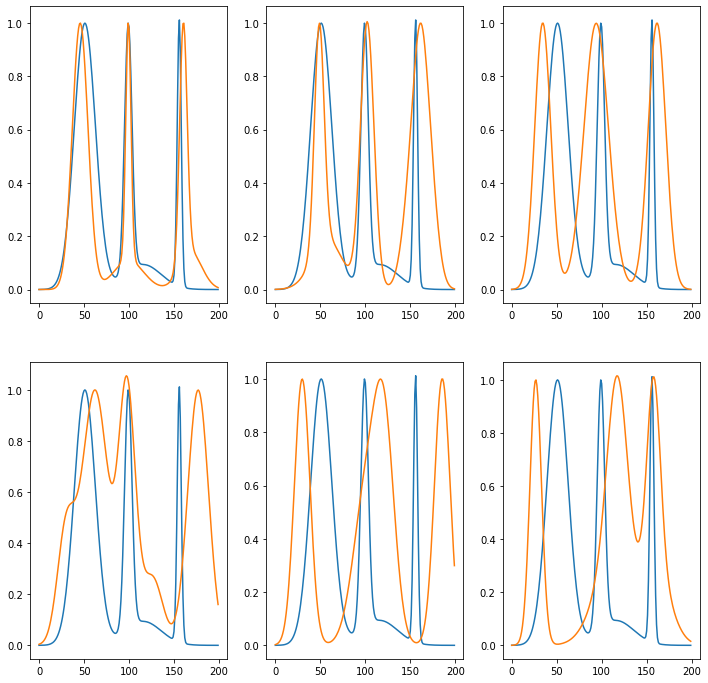

In [ ]:
x=np.array(range(200))

plt.rcParams['figure.figsize'] = [12, 12]

plt.subplot(2, 3, 1)
plt.plot(x,ior)
plt.plot(x,zor)

plt.subplot(2, 3, 2)
plt.plot(x,ior)
plt.plot(x,saor)

plt.subplot(2, 3, 3)
plt.plot(x,ior)
plt.plot(x,afgor)

plt.subplot(2, 3, 4)
plt.plot(x,ior)
plt.plot(x,usor)

plt.subplot(2, 3, 5)
plt.plot(x,ior)
plt.plot(x,ukor)

plt.subplot(2, 3, 6)
plt.plot(x,ior)
plt.plot(x,gor)

plt.show()

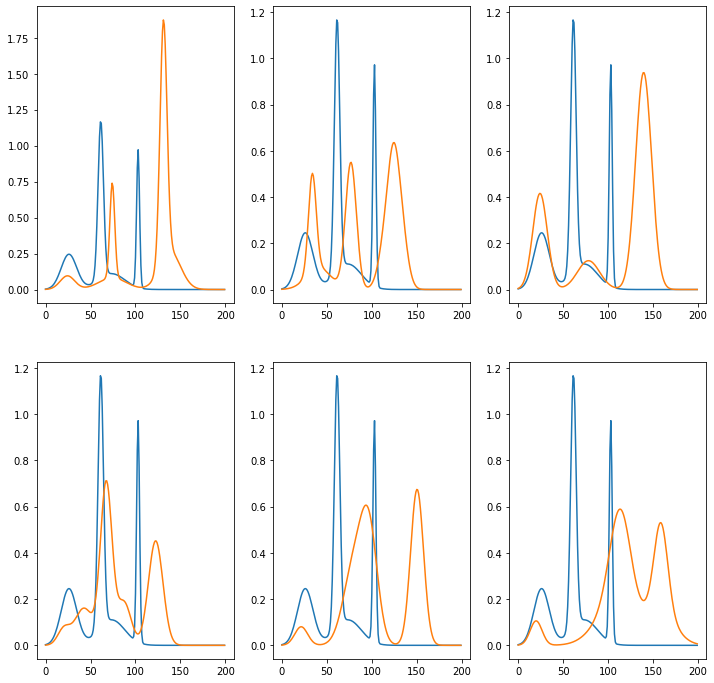

In [ ]:
x=np.array(range(200))

plt.subplot(2, 3, 1)
plt.plot(x,new_india_overall)
plt.plot(x,new_zim_overall)

plt.subplot(2, 3, 2)
plt.plot(x,new_india_overall)
plt.plot(x,new_sa_overall)

plt.subplot(2, 3, 3)
plt.plot(x,new_india_overall)
plt.plot(x,new_afg_overall)

plt.subplot(2, 3, 4)
plt.plot(x,new_india_overall)
plt.plot(x,new_us_overall)

plt.subplot(2, 3, 5)
plt.plot(x,new_india_overall)
plt.plot(x,new_uk_overall)

plt.subplot(2, 3, 6)
plt.plot(x,new_india_overall)
plt.plot(x,new_ger_overall)

plt.show()